In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [3]:
df=pd.read_csv('internshala_data - internshala_data (1).csv')

In [4]:
print("true are ", (df['verified']==1).sum())
print("fake are", (df['verified']==0).sum())

true are  353
fake are 735


In [5]:
df.columns

Index(['Unnamed: 0', 'job_title', 'company_name', 'location', 'salary',
       'description', 'company_description', 'jobs_posted',
       'hired_to_posted_ratio', 'has_company_logo', 'job_description_length',
       'Important_Word_Count', 'important_words', 'currency_in_title',
       'htp_ratio', 'no_of_employee', 'verified'],
      dtype='object')

In [6]:
df=df[df.columns[7:17]]
df

,jobs_posted,hired_to_posted_ratio,has_company_logo,job_description_length,Important_Word_Count,important_words,currency_in_title,htp_ratio,no_of_employee,verified
0,18,0.055556,1,1,12,1,1,0,NaN,0
1,112,0.330357,1,1,2,1,1,1,NaN,1
2,1010,0.013861,1,1,2,1,1,0,NaN,0
3,1010,0.013861,1,1,4,1,1,0,NaN,0
4,61,0.098361,1,1,11,1,1,0,NaN,0
...,...,...,...,...,...,...,...,...,...,...
1083,11,0.454545,1,1,6,1,1,1,4,1
1084,8,0.000000,1,1,10,1,1,0,0,0
1085,25,0.000000,1,1,18,1,1,0,5,0
1086,2,0.000000,1,1,13,1,1,0,1,0


In [7]:
df2=df['verified']
df3=df.drop(columns=['verified','no_of_employee'])

In [8]:
X_train, X_test, y_train, y_test = train_test_split(df3, df2, test_size = 0.3, random_state = 21)
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [9]:
y_pred = rfc.predict(X_test)

print('Model accuracy score : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score : 0.9327


In [10]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       222
           1       0.90      0.90      0.90       105

    accuracy                           0.93       327
   macro avg       0.92      0.92      0.92       327
weighted avg       0.93      0.93      0.93       327



In [11]:
importances = rfc.feature_importances_
feature_names = X_train.columns.tolist()
# Print feature importances
print("Feature Importance ")
for i, importance in enumerate(importances):
    print(f" {i+1}: {feature_names[i]} : {importance}")

Feature Importance 
 1: jobs_posted : 0.14443207978170414
 2: hired_to_posted_ratio : 0.4345771973272232
 3: has_company_logo : 0.0
 4: job_description_length : 0.0
 5: Important_Word_Count : 0.05726874809526095
 6: important_words : 0.001930589287231267
 7: currency_in_title : 0.0
 8: htp_ratio : 0.36179138550858037


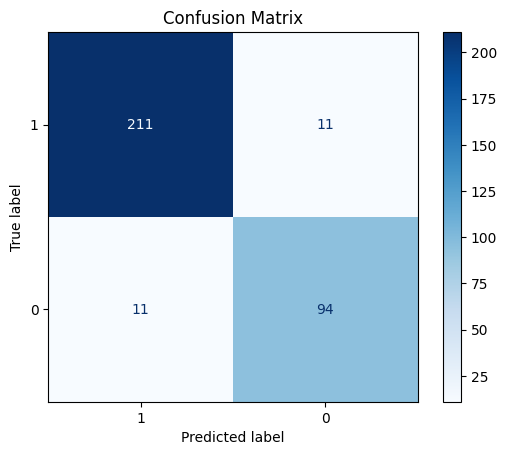

In [12]:
cm = confusion_matrix(y_test, y_pred)

# Visualize confusion matrix
target_names = ["1","0"]
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap=plt.cm.Blues, values_format='.0f')
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

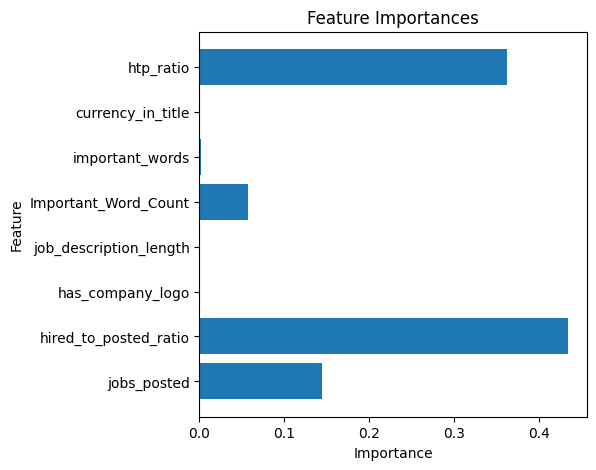

In [13]:
plt.figure(figsize=(5, 5))
plt.barh(feature_names, importances)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()


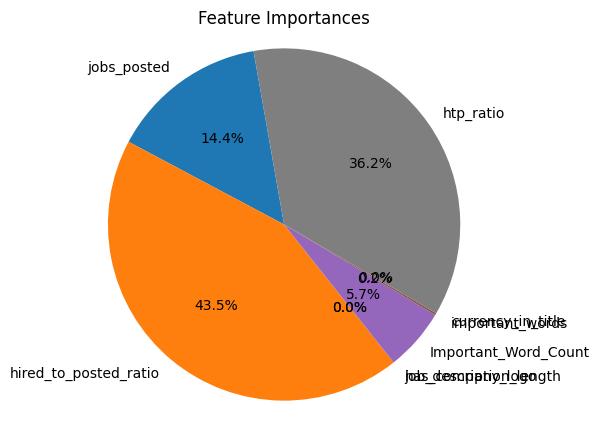

In [14]:
plt.figure(figsize=(5, 5))
plt.pie(importances, labels=feature_names, autopct='%1.1f%%', startangle=100)
plt.axis('equal') 
plt.title('Feature Importances')
plt.show()

Feature ranking:
1. feature 1 (0.434577)
2. feature 7 (0.361791)
3. feature 0 (0.144432)
4. feature 4 (0.057269)
5. feature 5 (0.001931)
6. feature 6 (0.000000)
7. feature 3 (0.000000)
8. feature 2 (0.000000)


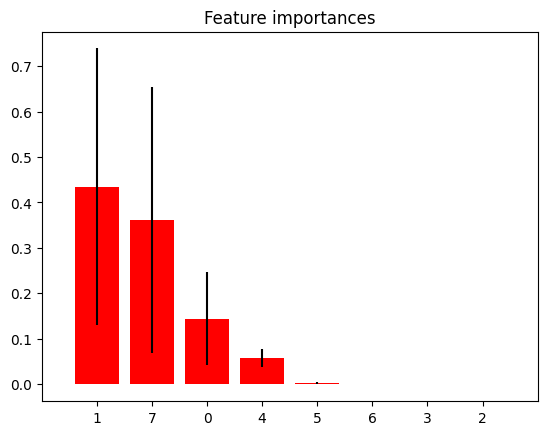

In [15]:
std = np.std([tree.feature_importances_ for tree in rfc.estimators_], axis=0)
indices = np.argsort(importances)[::-1]


print("Feature ranking:")
for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))


plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

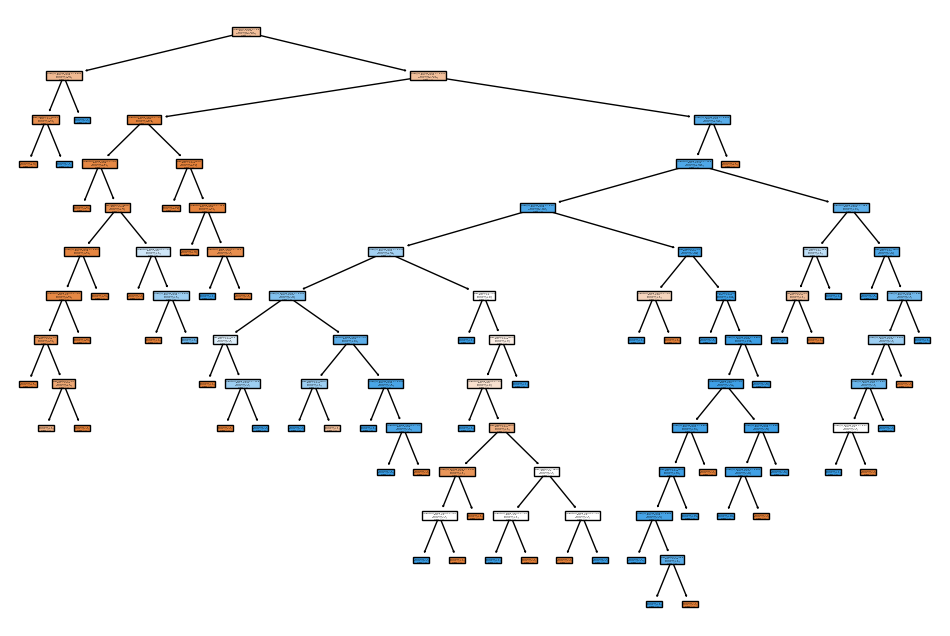

In [16]:
class_names=["1","0"]
plt.figure(figsize=(12, 8))
tree.plot_tree(rfc.estimators_[0], feature_names=feature_names, class_names=class_names, filled=True)
plt.show()

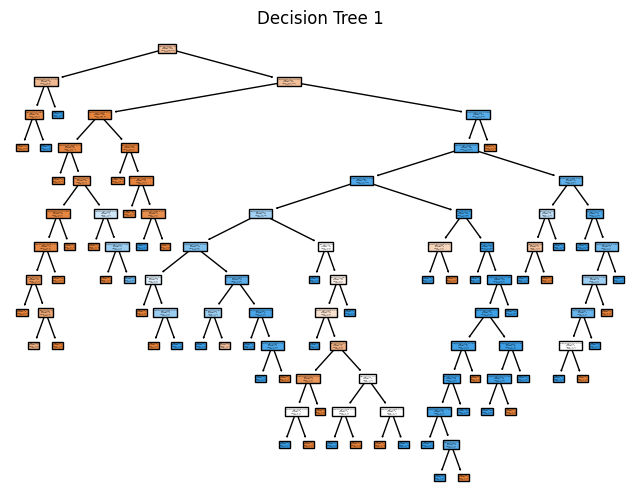

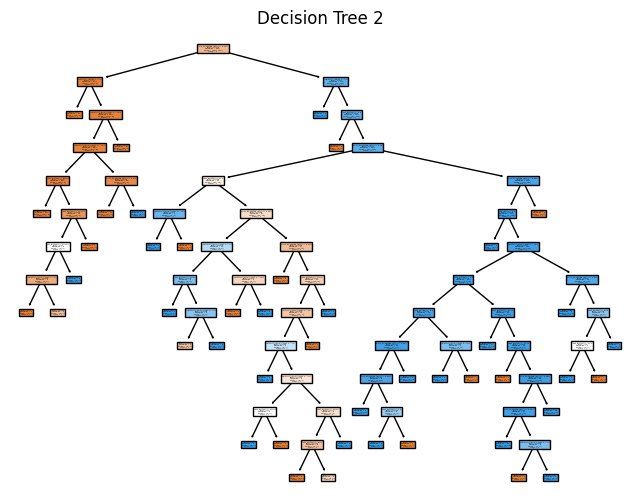

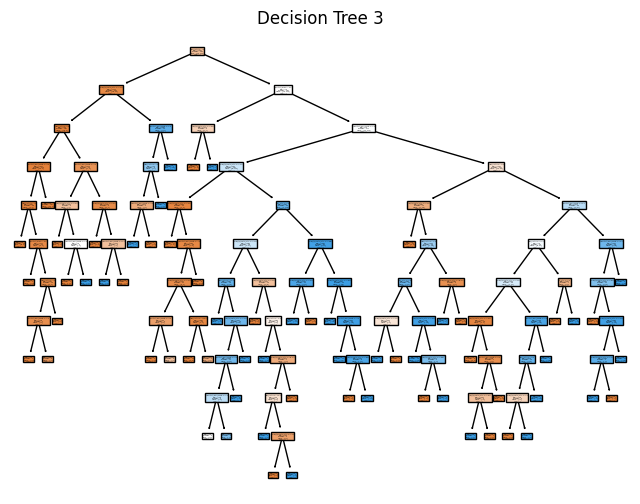

In [17]:
for i in range(3):  # Visualize first 3 trees
    plt.figure(figsize=(8, 6))
    tree.plot_tree(rfc.estimators_[i], feature_names=feature_names, class_names=class_names, filled=True)
    plt.title(f"Decision Tree {i+1}")
    plt.show()

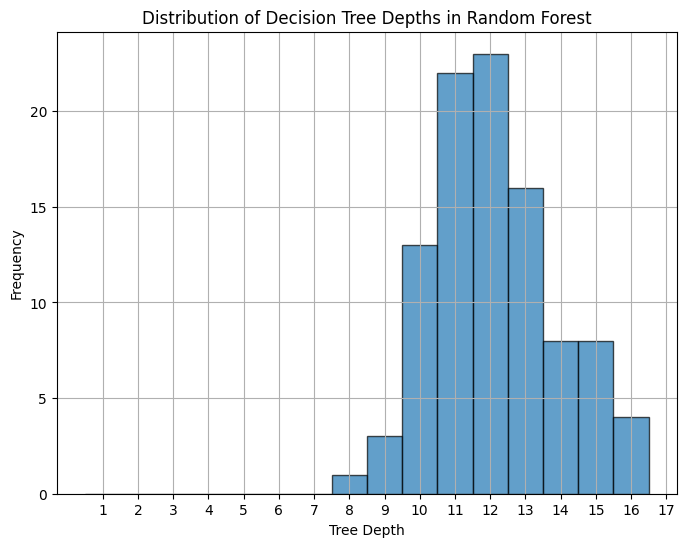

In [18]:
tree_depths = []
for tree in rfc.estimators_:
    tree_depths.append(tree.get_depth())


plt.figure(figsize=(8, 6))
plt.hist(tree_depths, bins=np.arange(1, max(tree_depths) + 1) - 0.5, edgecolor='black', alpha=0.7)
plt.xticks(np.arange(1, max(tree_depths) + 1))
plt.xlabel('Tree Depth')
plt.ylabel('Frequency')
plt.title('Distribution of Decision Tree Depths in Random Forest')
plt.grid(True)
plt.show()

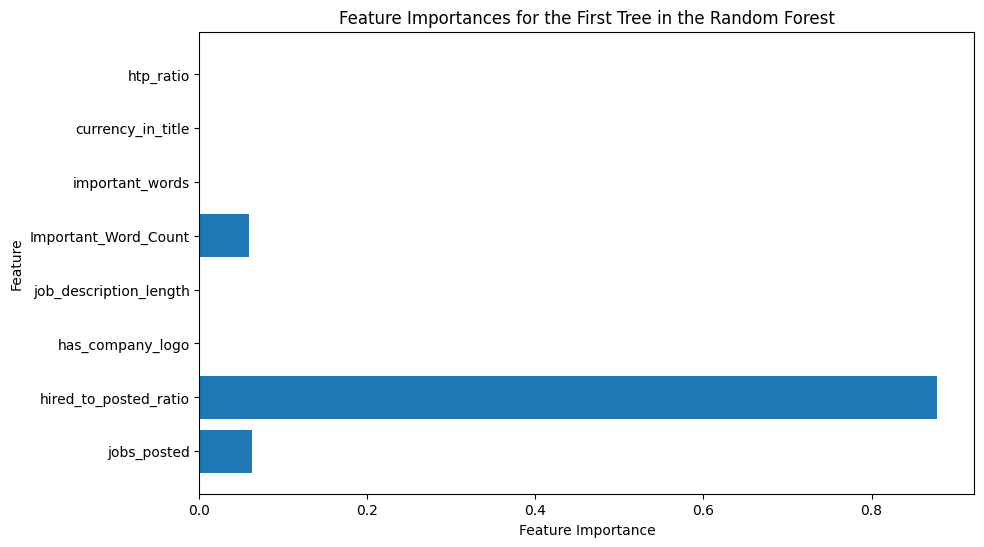

In [19]:
tree_feature_importances = rfc.estimators_[0].feature_importances_

# Visualize feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(len(tree_feature_importances)), tree_feature_importances, tick_label=feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances for the First Tree in the Random Forest')
plt.show()

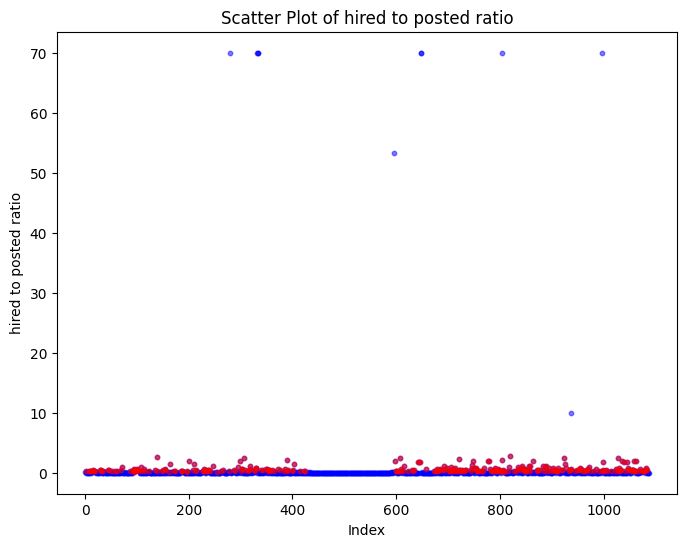

In [25]:
attribute = df3['hired_to_posted_ratio']
highlighted_points = np.logical_and(np.logical_and(attribute >= 0.2, attribute <= 7), np.logical_and(df['has_company_logo']==1,df['currency_in_title']==1),np.logical_and(df['job_description_length']==1,df['important_words']==1))
other_points = np.logical_and(np.logical_or(attribute < 0.2, attribute > 7),np.logical_and(df['has_company_logo']==1,df['currency_in_title']==1),np.logical_and(df['job_description_length']==1,df['important_words']==1))

plt.figure(figsize=(8, 6))
plt.scatter(range(len(attribute)), attribute, color='blue', alpha=0.5, s=10)  
plt.scatter(np.where(highlighted_points)[0], attribute[highlighted_points], color='red', alpha=0.5, s=10)  


plt.title('Scatter Plot of hired to posted ratio')
plt.xlabel('Index')
plt.ylabel('hired to posted ratio')

plt.show()

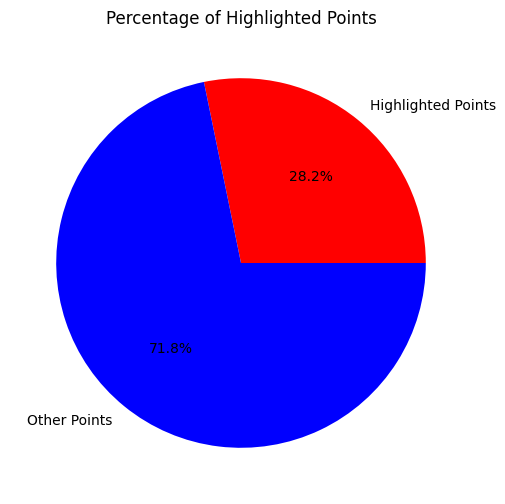

In [26]:
true_count = np.sum(highlighted_points)

false_count = np.sum(other_points)

data = [true_count, false_count]
labels = ['Highlighted Points', 'Other Points']

plt.figure(figsize=(8, 6))
plt.pie(data, labels=labels, autopct='%1.1f%%', colors=['red', 'blue'])
plt.title('Percentage of Highlighted Points')
plt.show()

